#Menghubungkan ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum04"

#Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

#Membaca data file CSV

In [32]:
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


#Melihat Informasi Umum

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [6]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


#Data Pre-Processing

##Cek Missing Value

In [7]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


##Cek nilai duplicate

In [8]:
df.duplicated().sum()

np.int64(0)

##Analisis korelasi antar variable numerik

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


##Visualisasi heatmap korelasi

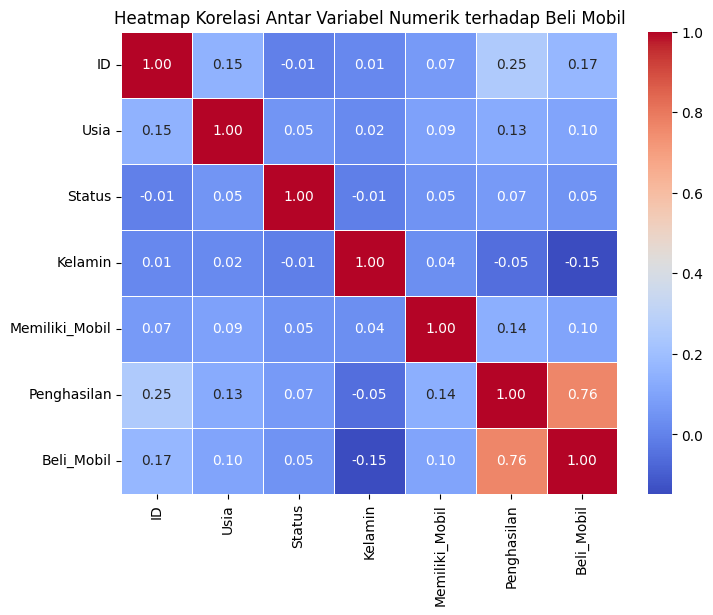

In [ ]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik terhadap Beli Mobil", fontsize=12)
plt.show()

#Pembagian Dataset (training & testing)

##Menentukan fitur dan target

In [19]:
# Fitur numerik dan biner
feature_num = ['Usia', 'Penghasilan']
feature_bin = ['Status', 'Kelamin', 'Memiliki_Mobil']

all_features = feature_num + feature_bin

# Gabungkan & drop missing
use_cols = all_features + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

x = df_model[all_features]
y = df_model['Beli_Mobil']

print("X.shape:", x.shape)
print("y.shape:", y.shape)

X.shape: (1000, 5)
y.shape: (1000,)


##Membagi Dataset menjadi Training dan Testing Set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)


Data latih: (800, 5)
Data uji: (200, 5)


#Membangun Model Logistic Regresion

In [21]:
# Scale hanya fitur numerik, passthrough untuk fitur biner
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin),
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")


✅ Model Logistic Regression berhasil dilatih.


#Prediksi model dan evaluasi model

In [31]:
#prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

#hitung numerik
print("="*35)
print("Evaluasi Model Logistic Regression")
print("="*35)
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Evaluasi Model Logistic Regression
Akurasi: 0.9300
Presisi: 0.9829
Recall: 0.9055
F1 Score: 0.9426
ROC AUC Score: 0.9769


#Visualisasi hasil evaluasi

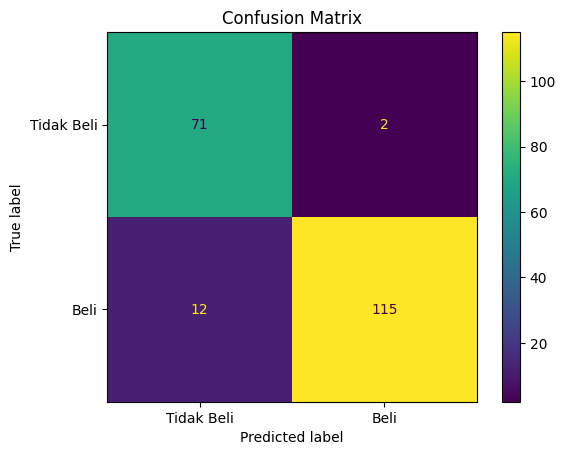

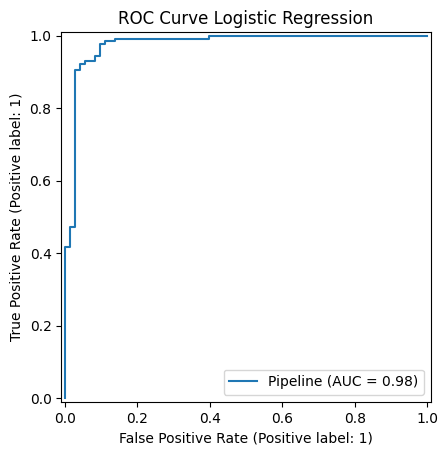

In [33]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli', 'Beli']
                      ).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()


#Classification Report

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['Tidak Beli (0)', 'Beli (1)']))

                precision    recall  f1-score   support

Tidak Beli (0)       0.86      0.97      0.91        73
      Beli (1)       0.98      0.91      0.94       127

      accuracy                           0.93       200
     macro avg       0.92      0.94      0.93       200
  weighted avg       0.94      0.93      0.93       200



#Cross validation

In [25]:
from sklearn.model_selection import cross_val_score

#Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, x, y, cv=5)

#Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi akurasi:", np.std(scores))

Skor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi akurasi: 0.06681317235396023


#Interpretasi Model Logistic Regression

In [26]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Penghasilan,4.550296,94.660404
4,Memiliki_Mobil,0.094958,1.099613
0,Usia,-0.046660,0.954412
2,Status,-0.124292,0.883122
3,Kelamin,-1.130837,0.322763


#Prediksi Data Baru (Contoh Kasus)

In [28]:
#contoh 2 orang
data_baru = pd.DataFrame ({
    'Usia': [45, 28],
    'Penghasilan': [300, 120],
    'Kelamin': [0, 1],
    'Status': [1, 0],
    'Memiliki_Mobil': [0, 2]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

,Usia,Penghasilan,Kelamin,Status,Memiliki_Mobil,Prob_Beli_Mobil,"Pred (0=Tidak,1=Ya)"
0,45,300,0,1,0,0.978487,1
1,28,120,1,0,2,0.003724,0
